## Score: 52

## Comment: 

<font color=Red>
Q1.[5+10+10] Correct
<br><br>
Q2.[11] Good Job! 对风速进行了正确的清洗，详细地分析了风速的各项指标
<br><br>
Q3.[6+5+5] Good job for sharing your work!
<br><br>
</font>

数据形状: (6616, 49)
列名: ['Search Parameters', 'Id', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu', 'Vol', 'Country', 'Area', 'Region', 'Location Name', 'Latitude', 'Longitude', 'Focal Depth (km)', 'Mag', 'Mw', 'Ms', 'Mb', 'Ml', 'Mfa', 'Unk', 'MMI Int', 'Deaths', 'Death Description', 'Missing', 'Missing Description', 'Injuries', 'Injuries Description', 'Damage ($Mil)', 'Damage Description', 'Houses Destroyed', 'Houses Destroyed Description', 'Houses Damaged', 'Houses Damaged Description', 'Total Deaths', 'Total Death Description', 'Total Missing', 'Total Missing Description', 'Total Injuries', 'Total Injuries Description', 'Total Damage ($Mil)', 'Total Damage Description', 'Total Houses Destroyed', 'Total Houses Destroyed Description', 'Total Houses Damaged', 'Total Houses Damaged Description']
开始分析地震数据...
1.1 前10个国家的地震死亡人数
CHINA: 2,106,524 人
TURKEY: 1,008,863 人
IRAN: 761,654 人
SYRIA: 487,726 人
ITALY: 423,280 人
HAITI: 323,782 人
JAPAN: 319,443 人
AZERBAIJAN: 319,251 人
INDONESIA: 282,838 人
ARM

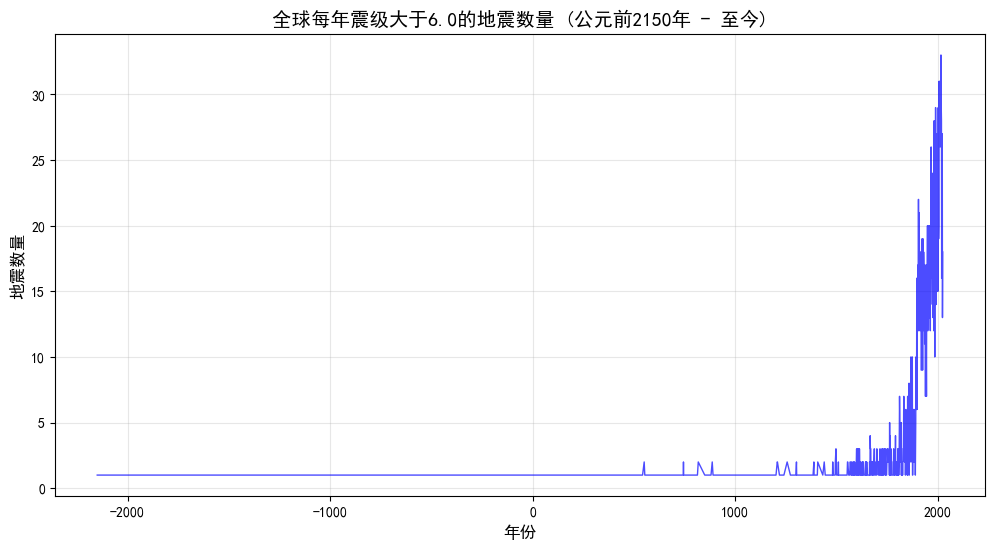


1.2 地震时间序列分析
数据时间范围: -2150 - 2025
数据列表已保存至: C:\Users\Administrator\Desktop\all\homework\code\yearly_earthquake_counts.csv

最近20年的地震数量示例:
------------------------------
年份: 2006, 地震数量: 20
年份: 2007, 地震数量: 31
年份: 2008, 地震数量: 27
年份: 2009, 地震数量: 27
年份: 2010, 地震数量: 31
年份: 2011, 地震数量: 30
年份: 2012, 地震数量: 29
年份: 2013, 地震数量: 26
年份: 2014, 地震数量: 30
年份: 2015, 地震数量: 28
年份: 2016, 地震数量: 33
年份: 2017, 地震数量: 33
年份: 2018, 地震数量: 29
年份: 2019, 地震数量: 28
年份: 2020, 地震数量: 16
年份: 2021, 地震数量: 23
年份: 2022, 地震数量: 21
年份: 2023, 地震数量: 27
年份: 2024, 地震数量: 13
年份: 2025, 地震数量: 18

1.3 各国地震统计（按地震总数降序排列 - 前20名）
国家                        地震总数         最大地震日期          最大震级      
--------------------------------------------------------------------------------
CHINA                     623          1668-07-25      8.5       
JAPAN                     424          2011-03-11      9.1       
INDONESIA                 421          2004-12-26      9.1       
IRAN                      388          856-12-22       7.9       
TURKEY    

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# 设置中文字体和输出目录
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
output_dir = r'C:\Users\Administrator\Desktop\all\homework\code'
os.makedirs(output_dir, exist_ok=True)

# 1. 读取数据
file_path = r'C:\Users\Administrator\Documents\xwechat_files\wxid_jd3axvzpk21j22_ef66\msg\file\2025-10\earthquakes-2025-10-29_21-06-00_+0800.tsv'
Sig_Eqs = pd.read_csv(file_path, sep='\t', encoding='utf-8')

print("数据形状:", Sig_Eqs.shape)
print("列名:", Sig_Eqs.columns.tolist())

# 1.1 计算每个国家的总死亡人数（前10名）
def task_1_1():
    # 使用Total Deaths列，处理缺失值
    deaths_by_country = Sig_Eqs.groupby('Country')['Total Deaths'].sum().fillna(0)
    top_10_countries = deaths_by_country.sort_values(ascending=False).head(10)

    print("=" * 60)
    print("1.1 前10个国家的地震死亡人数")
    print("=" * 60)
    for country, deaths in top_10_countries.items():
        print(f"{country}: {int(deaths):,} 人")

    return top_10_countries

# 1.2 计算每年震级大于6.0的地震数量并绘制时间序列（增加数据列表储存）
def task_1_2():
    # 过滤震级大于6.0的地震，处理缺失值
    large_earthquakes = Sig_Eqs[Sig_Eqs['Mag'] > 6.0].copy()
    large_earthquakes = large_earthquakes.dropna(subset=['Year', 'Mag'])

    # 按年分组计数
    yearly_counts = large_earthquakes.groupby('Year').size()

    # 创建数据列表储存每年的地震数量
    earthquake_data_list = []
    for year, count in yearly_counts.items():
        earthquake_data_list.append({
            'Year': int(year),
            'Earthquake_Count': int(count)
        })

    # 将数据列表转换为DataFrame以便查看和保存
    earthquake_df = pd.DataFrame(earthquake_data_list)
    earthquake_df = earthquake_df.sort_values('Year')

    # 绘制时间序列图
    plt.figure(figsize=(12, 6))
    plt.plot(earthquake_df['Year'], earthquake_df['Earthquake_Count'],
             linewidth=1, alpha=0.7, color='blue')
    plt.title('全球每年震级大于6.0的地震数量 (公元前2150年 - 至今)', fontsize=14, fontweight='bold')
    plt.xlabel('年份', fontsize=12)
    plt.ylabel('地震数量', fontsize=12)
    plt.grid(True, alpha=0.3)

    # 保存图片
    output_path = os.path.join(output_dir, 'earthquake_time_series.png')
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.show()

    # 保存数据列表到CSV文件
    data_output_path = os.path.join(output_dir, 'yearly_earthquake_counts.csv')
    earthquake_df.to_csv(data_output_path, index=False, encoding='utf-8-sig')

    print("\n" + "=" * 60)
    print("1.2 地震时间序列分析")
    print("=" * 60)
    print(f"数据时间范围: {earthquake_df['Year'].min()} - {earthquake_df['Year'].max()}")
    print(f"数据列表已保存至: {data_output_path}")

    # 显示最近20年的数据作为示例
    print("\n最近20年的地震数量示例:")
    print("-" * 30)
    recent_data = earthquake_df.tail(20)
    for _, row in recent_data.iterrows():
        print(f"年份: {row['Year']}, 地震数量: {row['Earthquake_Count']}")

    return yearly_counts, earthquake_data_list, earthquake_df

# 1.3 修复后的函数
def CountEq_LargestEq(country, data):

    country_data = data[data['Country'] == country].copy()

    if len(country_data) == 0:
        return 0, '无记录', 0

    # 地震总数
    total_earthquakes = len(country_data)

    # 找到有震级记录的数据
    country_data_with_mag = country_data.dropna(subset=['Mag'])

    if len(country_data_with_mag) == 0:
        # 如果没有震级记录，返回最早的地震记录
        country_data_sorted = country_data.sort_values('Year')
        first_eq = country_data_sorted.iloc[0]
        year = int(first_eq['Year'])
        month = int(first_eq['Mo']) if pd.notna(first_eq['Mo']) else 1
        day = int(first_eq['Dy']) if pd.notna(first_eq['Dy']) else 1
        date_str = f"{year}-{month:02d}-{day:02d}"
        return total_earthquakes, date_str, 0

    # 找到最大震级的地震
    max_mag_idx = country_data_with_mag['Mag'].idxmax()
    largest_eq = country_data_with_mag.loc[max_mag_idx]

    # 构建日期字符串，处理缺失的月日信息
    year = int(largest_eq['Year'])
    month = int(largest_eq['Mo']) if pd.notna(largest_eq['Mo']) else 1
    day = int(largest_eq['Dy']) if pd.notna(largest_eq['Dy']) else 1

    date_str = f"{year}-{month:02d}-{day:02d}"
    max_magnitude = largest_eq['Mag']

    return total_earthquakes, date_str, max_magnitude

def task_1_3():
    # 获取所有国家
    all_countries = Sig_Eqs['Country'].unique()

    results = []
    for country in all_countries:
        if pd.isna(country):
            continue
        count, date, max_mag = CountEq_LargestEq(country, Sig_Eqs)
        results.append({
            'Country': country,
            'Total Earthquakes': count,
            'Largest Earthquake Date': date,
            'Max Magnitude': max_mag
        })

    # 创建结果DataFrame并按地震数量降序排列
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('Total Earthquakes', ascending=False)

    print("\n" + "=" * 80)
    print("1.3 各国地震统计（按地震总数降序排列 - 前20名）")
    print("=" * 80)
    print(f"{'国家':<25} {'地震总数':<12} {'最大地震日期':<15} {'最大震级':<10}")
    print("-" * 80)

    for _, row in results_df.head(20).iterrows():
        mag_display = f"{row['Max Magnitude']:.1f}" if row['Max Magnitude'] > 0 else "无记录"
        print(f"{row['Country']:<25} {row['Total Earthquakes']:<12} {row['Largest Earthquake Date']:<15} {mag_display:<10}")

    # 保存完整结果到CSV文件
    output_csv = os.path.join(output_dir, 'country_earthquake_statistics.csv')
    results_df.to_csv(output_csv, index=False, encoding='utf-8-sig')
    print(f"\n完整结果已保存至: {output_csv}")

    return results_df

# 执行所有任务
if __name__ == "__main__":
    print("开始分析地震数据...")

    # 执行任务1.1
    result_1_1 = task_1_1()

    # 执行任务1.2（现在返回三个值）
    result_1_2, data_list_1_2, earthquake_df_1_2 = task_1_2()

    # 执行任务1.3
    result_1_3 = task_1_3()

    print("\n" + "=" * 60)
    print("所有任务完成!")
    print("=" * 60)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11616\789708255.py:24: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


数据读取完成，共111984条记录

正在解析WND字段...

有效风速数据记录: 111346/111984 (99.43%)
计算完成，共129个月的月平均数据
时间范围: 2010-01-01 00:00:00 到 2020-09-01 00:00:00

=== 统计摘要 ===
总体月平均风速: 3.385 m/s
最大月平均风速: 5.576 m/s (出现在 2020-06)
最小月平均风速: 2.520 m/s (出现在 2010-11)
数据时间跨度: 129 个月

=== 趋势分析 ===
线性趋势斜率: 0.004818 m/s/月
10年变化量: 0.5782 m/s
相关系数 R: 0.3680
P值: 0.000018
趋势显著性: 在95%置信水平下具有统计显著性 (上升趋势)
图表已保存到: E:\homework_files\wind_speed_trend.png


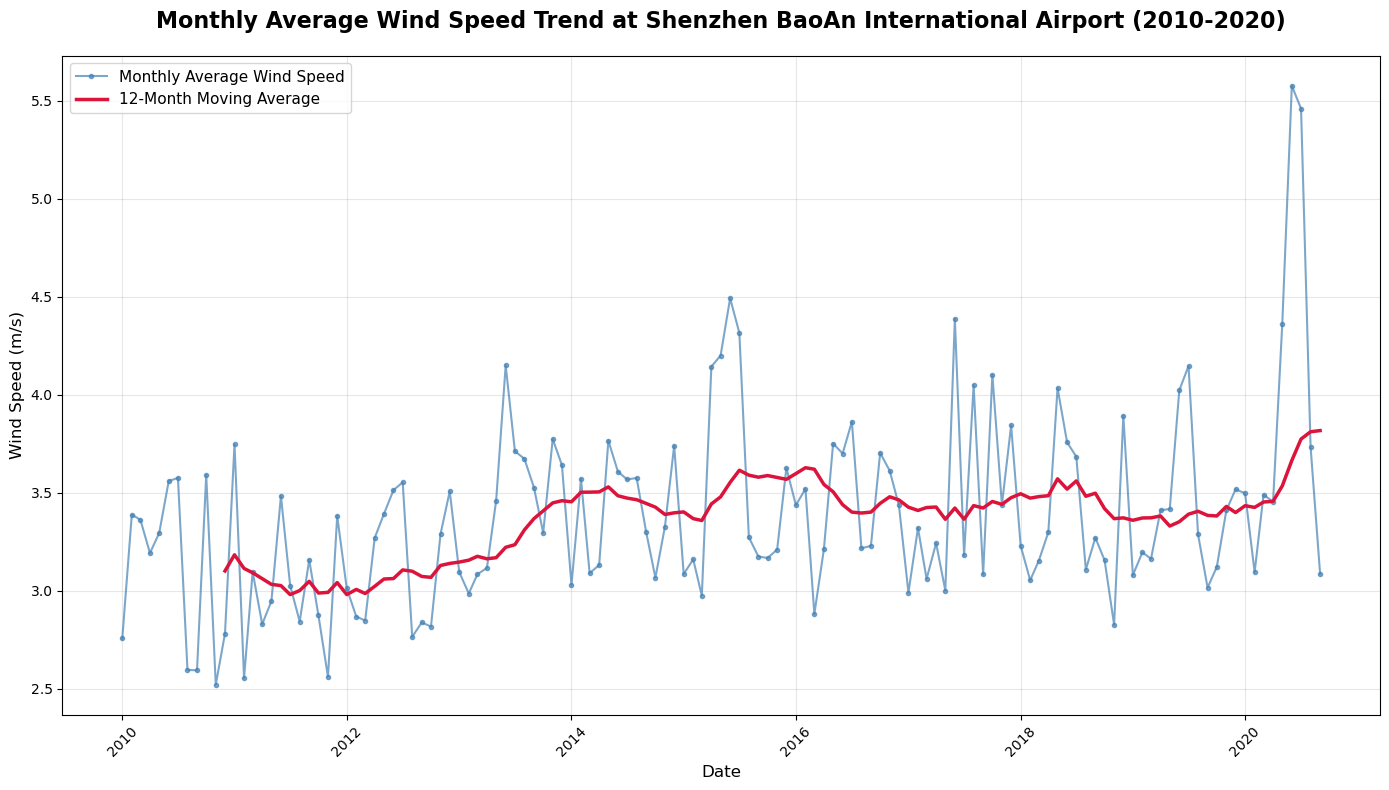


月平均数据已保存到: E:\homework_files\monthly_wind_speed_shenzhen_2010_2020.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import matplotlib as mpl
import os

# 设置字体和图表样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False
mpl.style.use('default')

def load_and_process_wind_data(file_path):
    """
    加载并处理风速数据

    Parameters:
    file_path: 数据文件路径

    Returns:
    pandas.DataFrame: 处理后的数据
    """
    # 读取CSV文件
    df = pd.read_csv(file_path)
    print(f"数据读取完成，共{len(df)}条记录")

    # 解析WND字段 - 根据POS 61-70的定义
    # WND字段格式: "风向,风向质量码,风类型码,风速,风速质量码"
    print("\n正在解析WND字段...")

    def parse_wnd_field(wnd_str):
        """
        解析WND字段，提取风速信息
        根据定义：POS 66-69是风速速率，需要除以10得到实际风速(m/s)
        """
        if pd.isna(wnd_str):
            return np.nan

        try:
            # 清理字符串并分割
            parts = str(wnd_str).strip('"').split(',')
            if len(parts) >= 4:
                wind_direction = parts[0]  # 风向 (POS 61-63)
                wind_dir_quality = parts[1]  # 风向质量码 (POS 64)
                wind_type = parts[2]  # 风类型码 (POS 65)
                wind_speed_rate = parts[3]  # 风速速率 (POS 66-69)
                wind_speed_quality = parts[4] if len(parts) > 4 else ''  # 风速质量码 (POS 70)

                # =============================================================================
                # 数据质量筛选流程
                # 第一步：检查质量码 - 只保留可靠的质量等级
                # 质量码说明:
                # 0=通过粗限检查, 1=通过所有质量控制, 2=可疑, 3=错误,
                # 4-7=来自NCEI数据的对应状态, 9=如果元素存在则通过粗限检查
                valid_quality_codes = ['0', '1', '4', '5', '9']

                if not (wind_speed_quality in valid_quality_codes and
                        wind_dir_quality in valid_quality_codes):
                    return np.nan  # 质量码不合格，排除数据

                # 第二步：检查风类型码
                # 根据定义：类型码9表示缺失，但NOTE说明：如果类型码=9且风速=0000，表示静风应保留
                if wind_type == '9':
                    # 类型码为9（缺失），但根据NOTE，如果同时风速为0000，表示静风应保留
                    if wind_speed_rate == '0000':
                        # 这是有效的静风记录，继续处理
                        pass
                    else:
                        # 类型码为9且风速不为0000，这是真正的缺失数据，排除
                        return np.nan

                # 第三步：检查风向合理性
                # 对于非C（静风）/V（可变）类型，风向=999表示缺失应排除
                # 对于C/V类型，风向=999是合理的观测值
                if wind_direction == '999':
                    if wind_type not in ['C', 'V']:
                        # 非静风/可变类型但风向缺失，排除数据
                        return np.nan
                    # 如果是C或V类型，风向999是合理的，继续处理

                # 第四步：检查风速缺失值
                if wind_speed_rate == '9999':
                    return np.nan  # 风速缺失，排除数据

                # 第五步：数据格式转换和范围验证
                try:
                    # 将风速速率转换为实际风速（除以10）
                    wind_speed = float(wind_speed_rate) / 10.0
                    # 检查风速是否在合理范围内 (0-90 m/s)
                    if 0 <= wind_speed <= 90:
                        return wind_speed
                    else:
                        return np.nan  # 风速超出合理范围
                except ValueError:
                    return np.nan  # 风速格式错误

            else:
                return np.nan  # WND字段格式不完整
        except Exception as e:
            return np.nan  # 解析过程中出现异常

    # 应用解析函数
    df['wind_speed'] = df['WND'].apply(parse_wnd_field)

    # 统计有效数据
    valid_wind_count = df['wind_speed'].notna().sum()
    print(f"\n有效风速数据记录: {valid_wind_count}/{len(df)} ({valid_wind_count/len(df)*100:.2f}%)")

    # 解析日期时间
    df['datetime'] = pd.to_datetime(df['DATE'])

    # 提取年份和月份用于分组
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['year_month'] = df['datetime'].dt.to_period('M')

    return df

def calculate_monthly_averages(df):
    """
    计算月平均风速

    Parameters:
    df: 包含风速和日期信息的数据框

    Returns:
    pandas.DataFrame: 月平均风速数据
    """

    # 按年月分组计算月平均风速
    monthly_avg = df.groupby('year_month').agg({
        'wind_speed': 'mean',
        'year': 'first',
        'month': 'first'
    }).reset_index()

    # 转换为时间序列
    monthly_avg['date'] = monthly_avg['year_month'].dt.to_timestamp()
    monthly_avg = monthly_avg.sort_values('date')

    print(f"计算完成，共{len(monthly_avg)}个月的月平均数据")
    print(f"时间范围: {monthly_avg['date'].min()} 到 {monthly_avg['date'].max()}")

    return monthly_avg

def plot_wind_speed_trend(monthly_avg):
    """
    绘制月平均风速趋势图

    Parameters:
    monthly_avg: 月平均风速数据
    """

    # 创建图表
    fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))

    # 月平均风速时间序列
    ax1.plot(monthly_avg['date'], monthly_avg['wind_speed'],
             linewidth=1.5, marker='o', markersize=3, alpha=0.7,
             color='steelblue', label='Monthly Average Wind Speed')

    # 添加趋势线（12个月移动平均）
    monthly_avg['moving_avg'] = monthly_avg['wind_speed'].rolling(window=12, center=False).mean()
    ax1.plot(monthly_avg['date'], monthly_avg['moving_avg'],
             linewidth=2.5, color='crimson',
             label='12-Month Moving Average')

    ax1.set_title('Monthly Average Wind Speed Trend at Shenzhen BaoAn International Airport (2010-2020)', fontsize=16, fontweight='bold', pad=20)
    ax1.set_ylabel('Wind Speed (m/s)', fontsize=12)
    ax1.set_xlabel('Date', fontsize=12)
    ax1.legend(fontsize=11)
    ax1.grid(True, alpha=0.3)

    # 设置x轴刻度
    ax1.tick_params(axis='x', rotation=45)

    # 调整布局
    plt.tight_layout()

    # 显示统计信息
    overall_avg = monthly_avg['wind_speed'].mean()
    max_speed = monthly_avg['wind_speed'].max()
    min_speed = monthly_avg['wind_speed'].min()
    max_date = monthly_avg.loc[monthly_avg['wind_speed'].idxmax(), 'date']
    min_date = monthly_avg.loc[monthly_avg['wind_speed'].idxmin(), 'date']

    print(f"\n=== 统计摘要 ===")
    print(f"总体月平均风速: {overall_avg:.3f} m/s")
    print(f"最大月平均风速: {max_speed:.3f} m/s (出现在 {max_date.strftime('%Y-%m')})")
    print(f"最小月平均风速: {min_speed:.3f} m/s (出现在 {min_date.strftime('%Y-%m')})")
    print(f"数据时间跨度: {len(monthly_avg)} 个月")

    # 计算趋势（使用线性回归）
    from scipy import stats
    x = np.arange(len(monthly_avg))
    y = monthly_avg['wind_speed'].values
    mask = ~np.isnan(y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask], y[mask])

    print(f"\n=== 趋势分析 ===")
    print(f"线性趋势斜率: {slope:.6f} m/s/月")
    print(f"10年变化量: {slope * 120:.4f} m/s")
    print(f"相关系数 R: {r_value:.4f}")
    print(f"P值: {p_value:.6f}")

    if p_value < 0.05:
        trend_direction = "上升" if slope > 0 else "下降"
        print(f"趋势显著性: 在95%置信水平下具有统计显著性 ({trend_direction}趋势)")
    else:
        print("趋势显著性: 在95%置信水平下无统计显著性")

    # 保存图表到指定目录
    output_dir = r"E:\homework_files"
    os.makedirs(output_dir, exist_ok=True)
    chart_path = os.path.join(output_dir, "wind_speed_trend.png")
    plt.savefig(chart_path, dpi=300, bbox_inches='tight')
    print(f"图表已保存到: {chart_path}")

    plt.show()

    return slope, p_value

def main():
    """
    主函数
    """
    # 文件路径 - 请根据实际情况修改
    file_path = r"E:\Edge Downloads\2281305.csv"  # 或完整的文件路径

    try:
        # 1. 加载和处理数据
        df = load_and_process_wind_data(file_path)

        # 2. 计算月平均风速
        monthly_avg = calculate_monthly_averages(df)

        # 3. 绘制趋势图并分析
        slope, p_value = plot_wind_speed_trend(monthly_avg)

        # 4. 保存处理后的数据到指定目录
        output_dir = r"E:\homework_files"
        os.makedirs(output_dir, exist_ok=True)
        output_file = os.path.join(output_dir, 'monthly_wind_speed_shenzhen_2010_2020.csv')
        monthly_avg.to_csv(output_file, index=False)
        print(f"\n月平均数据已保存到: {output_file}")

    except FileNotFoundError:
        print(f"错误: 找不到文件 {file_path}")
        print("请确保：")
        print("1. 文件存在于当前工作目录")
        print("2. 文件名正确")
        print("3. 已解压zip文件")
    except Exception as e:
        print(f"处理过程中出现错误: {str(e)}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

3.1 数据加载与清理
原始数据形状: (33959, 3)
数据列名: ['station_id', 'date', 'value']

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33959 entries, 0 to 33958
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   station_id  33959 non-null  int64         
 1   date        33959 non-null  datetime64[ns]
 2   value       33959 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 796.0 KB
None

缺失值统计:
Series([], dtype: int64)

移除缺失值后数据行数: 33959 (移除 0 行)
检测到异常值数量: 3461

数据质量总结:
- 总记录数: 33959
- 完整记录数: 33959
- 数值范围: 33.50 - 17900.00

3.2 时间序列分析
使用时间列: date
使用数值列: value


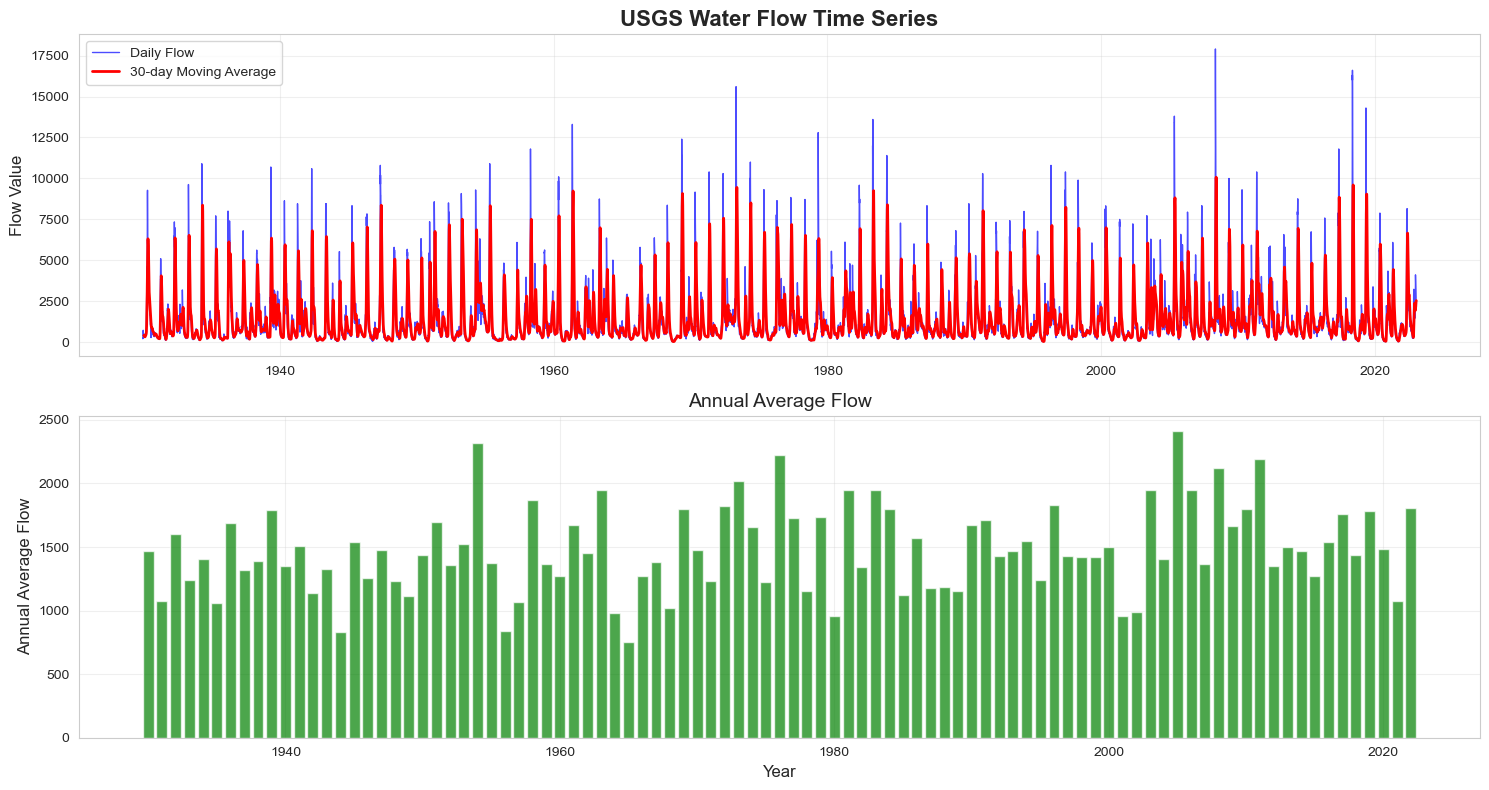

时间序列图已保存为 'water_data_time_series.png'

3.3 统计检验与分析
进行5项统计检验:
----------------------------------------
1. 正态性检验: p值 = 0.000000 - 数据不服从正态分布
2. 趋势检验: τ = 0.0662, p值 = 0.000000 - 显著上升趋势
3. 变异系数: 1.2384 - 高变异性
4. 一阶自相关: 0.9948 - 显著自相关
5. 分布形状: 偏度 = 2.6923, 峰度 = 8.8054

基本统计量:
- 均值: 1480.26
- 标准差: 1833.15
- 中位数: 785.00
- 偏度: 2.6923
- 峰度: 8.8054
- 最小值: 33.50
- 最大值: 17900.00
- 四分位距: 1285.00

数据分析报告总结

USGS水文数据分析报告
数据来源: C:\Users\Administrator\Desktop\all\homework\code\1.xlsx
分析时间: 2025-11-12 16:07:24

1. 数据概况:
   - 总记录数: 33959
   - 分析时段: 1930-01-01 00:00:00 至 2022-12-31 00:00:00
   - 数据完整性: 100.0%
   - 监测站数量: 1

2. 主要发现:
   - Shapiro-Wilk正态性检验: 数据不服从正态分布
   - Kendall趋势检验: 显著上升趋势
   - 变异系数: 高变异性
   - 一阶自相关: 显著自相关
   - 分布形状: 偏度: 2.692, 峰度: 8.805

3. 数据质量评估:
   - 缺失值: 无
   - 异常值: 已检测并标记
   - 时间跨度: 33967 days 00:00:00


完整报告已保存为 'water_data_analysis_report.txt'

数据分析完成！


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

class WaterDataAnalyzer:
    def __init__(self, data_path):
        """
        初始化水文数据分析器

        Parameters:
        data_path: 数据文件路径
        """
        self.data_path = data_path
        self.df = None
        self.cleaned_df = None
        self.analysis_results = {}

    def load_and_clean_data(self):
        """
        3.1 加载数据并清理缺失值和低质量数据
        """
        print("=" * 60)
        print("3.1 数据加载与清理")
        print("=" * 60)

        try:
            # 读取数据
            if self.data_path.endswith('.csv'):
                self.df = pd.read_csv(self.data_path, encoding='utf-8')
            else:
                self.df = pd.read_excel(self.data_path, engine='openpyxl')

            print(f"原始数据形状: {self.df.shape}")
            print(f"数据列名: {list(self.df.columns)}")

            # 显示数据基本信息
            print("\n数据基本信息:")
            print(self.df.info())

            # 检查缺失值
            print("\n缺失值统计:")
            missing_data = self.df.isnull().sum()
            print(missing_data[missing_data > 0])

            # 数据清理步骤
            self.cleaned_df = self.df.copy()

            # 1. 处理缺失值 - 使用实际的列名
            initial_rows = len(self.cleaned_df)
            # 根据实际列名清理数据
            if 'value' in self.cleaned_df.columns and 'date' in self.cleaned_df.columns:
                self.cleaned_df = self.cleaned_df.dropna(subset=['value', 'date'])
            else:
                # 如果列名不同，使用前两列
                value_col = self.cleaned_df.columns[2]
                date_col = self.cleaned_df.columns[1]
                self.cleaned_df = self.cleaned_df.dropna(subset=[value_col, date_col])

            print(f"\n移除缺失值后数据行数: {len(self.cleaned_df)} (移除 {initial_rows - len(self.cleaned_df)} 行)")

            # 2. 处理异常值（使用IQR方法）
            value_col = 'value' if 'value' in self.cleaned_df.columns else self.cleaned_df.columns[2]

            if value_col in self.cleaned_df.columns:
                Q1 = self.cleaned_df[value_col].quantile(0.25)
                Q3 = self.cleaned_df[value_col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                outliers = self.cleaned_df[(self.cleaned_df[value_col] < lower_bound) |
                                         (self.cleaned_df[value_col] > upper_bound)]
                print(f"检测到异常值数量: {len(outliers)}")

                # 可以选择移除或保留异常值，这里选择保留但标记
                self.cleaned_df['is_outlier'] = (self.cleaned_df[value_col] < lower_bound) | \
                                              (self.cleaned_df[value_col] > upper_bound)

            # 3. 数据质量检查
            print(f"\n数据质量总结:")
            print(f"- 总记录数: {len(self.cleaned_df)}")
            print(f"- 完整记录数: {len(self.cleaned_df.dropna())}")
            if value_col in self.cleaned_df.columns:
                print(f"- 数值范围: {self.cleaned_df[value_col].min():.2f} - {self.cleaned_df[value_col].max():.2f}")

            return self.cleaned_df

        except Exception as e:
            print(f"数据加载错误: {e}")
            return None

    def plot_time_series(self, time_col='date', value_col='value'):
        """
        3.2 绘制时间序列图

        Parameters:
        time_col: 时间列名
        value_col: 数值列名
        """
        print("\n" + "=" * 60)
        print("3.2 时间序列分析")
        print("=" * 60)

        if self.cleaned_df is None:
            print("请先加载和清理数据")
            return

        try:
            # 确保使用正确的列名
            if time_col not in self.cleaned_df.columns:
                time_col = self.cleaned_df.columns[1]  # 使用第二列作为时间

            if value_col not in self.cleaned_df.columns:
                value_col = self.cleaned_df.columns[2]  # 使用第三列作为数值

            print(f"使用时间列: {time_col}")
            print(f"使用数值列: {value_col}")

            # 创建时间序列图
            plt.figure(figsize=(15, 8))

            # 主时间序列
            plt.subplot(2, 1, 1)
            plt.plot(self.cleaned_df[time_col], self.cleaned_df[value_col],
                    linewidth=1, alpha=0.7, color='blue', label='Daily Flow')

            # 添加移动平均线显示趋势
            window = min(30, len(self.cleaned_df) // 10)  # 自适应窗口大小
            if window > 1:
                moving_avg = self.cleaned_df[value_col].rolling(window=window).mean()
                plt.plot(self.cleaned_df[time_col], moving_avg,
                        linewidth=2, color='red', label=f'{window}-day Moving Average')

            plt.title('USGS Water Flow Time Series', fontsize=16, fontweight='bold')
            plt.ylabel('Flow Value', fontsize=12)
            plt.legend()
            plt.grid(True, alpha=0.3)

            # 年度聚合视图
            plt.subplot(2, 1, 2)
            # 确保时间列是datetime类型
            if pd.api.types.is_datetime64_any_dtype(self.cleaned_df[time_col]):
                yearly_data = self.cleaned_df.groupby(self.cleaned_df[time_col].dt.year)[value_col].mean()
                plt.bar(yearly_data.index, yearly_data.values, alpha=0.7, color='green')
                plt.title('Annual Average Flow', fontsize=14)
                plt.xlabel('Year', fontsize=12)
                plt.ylabel('Annual Average Flow', fontsize=12)
                plt.grid(True, alpha=0.3)
            else:
                # 如果时间列不是datetime，显示月度分布
                monthly_counts = self.cleaned_df.groupby(self.cleaned_df[time_col].astype(str).str[:7]).size()
                plt.bar(range(len(monthly_counts)), monthly_counts.values, alpha=0.7, color='orange')
                plt.title('Monthly Data Distribution', fontsize=14)
                plt.xlabel('Time Period', fontsize=12)
                plt.ylabel('Data Points', fontsize=12)
                plt.grid(True, alpha=0.3)

            plt.tight_layout()
            plt.savefig('water_data_time_series.png', dpi=300, bbox_inches='tight')
            plt.show()

            print("时间序列图已保存为 'water_data_time_series.png'")

        except Exception as e:
            print(f"绘图错误: {e}")

    def statistical_analysis(self, value_col='value'):
        """
        3.3 进行统计检验和分析

        Parameters:
        value_col: 数值列名
        """
        print("\n" + "=" * 60)
        print("3.3 统计检验与分析")
        print("=" * 60)

        if self.cleaned_df is None:
            print("请先加载和清理数据")
            return

        try:
            # 确保使用正确的列名
            if value_col not in self.cleaned_df.columns:
                value_col = self.cleaned_df.columns[2]  # 使用第三列作为数值

            data = self.cleaned_df[value_col]

            # 统计检验结果存储
            results = {}

            print("进行5项统计检验:")
            print("-" * 40)

            # 1. 正态性检验 (Shapiro-Wilk test)
            # 对于大数据集，随机抽样进行检验
            if len(data) > 5000:
                sample_data = data.sample(n=5000, random_state=42)
            else:
                sample_data = data

            stat, p_value = stats.shapiro(sample_data)
            results['normality_test'] = {
                'test': 'Shapiro-Wilk正态性检验',
                'statistic': stat,
                'p_value': p_value,
                'conclusion': '数据服从正态分布' if p_value > 0.05 else '数据不服从正态分布'
            }
            print(f"1. 正态性检验: p值 = {p_value:.6f} - {results['normality_test']['conclusion']}")

            # 2. 趋势检验 (Kendall's tau)
            from scipy.stats import kendalltau
            if len(data) > 10:
                time_points = np.arange(len(data))
                tau, p_trend = kendalltau(time_points, data)
                trend_direction = "上升" if tau > 0 else "下降"
                results['trend_test'] = {
                    'test': 'Kendall趋势检验',
                    'tau': tau,
                    'p_value': p_trend,
                    'conclusion': f'显著{trend_direction}趋势' if p_trend < 0.05 else '无显著趋势'
                }
                print(f"2. 趋势检验: τ = {tau:.4f}, p值 = {p_trend:.6f} - {results['trend_test']['conclusion']}")

            # 3. 变异系数计算
            cv = data.std() / data.mean()
            results['variability'] = {
                'test': '变异系数',
                'value': cv,
                'conclusion': '高变异性' if cv > 1 else '中等变异性' if cv > 0.5 else '低变异性'
            }
            print(f"3. 变异系数: {cv:.4f} - {results['variability']['conclusion']}")

            # 4. 自相关检验 (lag-1)
            if len(data) > 2:
                autocorr = data.autocorr(lag=1)
                results['autocorrelation'] = {
                    'test': '一阶自相关',
                    'value': autocorr,
                    'conclusion': '显著自相关' if abs(autocorr) > 0.5 else '弱自相关'
                }
                print(f"4. 一阶自相关: {autocorr:.4f} - {results['autocorrelation']['conclusion']}")

            # 5. 分布形状分析
            skewness = data.skew()
            kurt = data.kurtosis()
            results['distribution'] = {
                'test': '分布形状',
                'skewness': skewness,
                'kurtosis': kurt,
                'conclusion': f'偏度: {skewness:.3f}, 峰度: {kurt:.3f}'
            }
            print(f"5. 分布形状: 偏度 = {skewness:.4f}, 峰度 = {kurt:.4f}")

            # 基本统计量
            print("\n基本统计量:")
            print(f"- 均值: {data.mean():.2f}")
            print(f"- 标准差: {data.std():.2f}")
            print(f"- 中位数: {data.median():.2f}")
            print(f"- 偏度: {data.skew():.4f}")
            print(f"- 峰度: {data.kurtosis():.4f}")
            print(f"- 最小值: {data.min():.2f}")
            print(f"- 最大值: {data.max():.2f}")
            print(f"- 四分位距: {data.quantile(0.75) - data.quantile(0.25):.2f}")

            self.analysis_results = results
            return results

        except Exception as e:
            print(f"统计分析错误: {e}")
            return None

    def generate_report(self):
        """
        生成分析报告
        """
        print("\n" + "=" * 60)
        print("数据分析报告总结")
        print("=" * 60)

        if self.cleaned_df is None:
            print("无可用数据进行分析")
            return

        # 确定实际使用的列名
        time_col = 'date' if 'date' in self.cleaned_df.columns else self.cleaned_df.columns[1]
        value_col = 'value' if 'value' in self.cleaned_df.columns else self.cleaned_df.columns[2]

        report = f"""
USGS水文数据分析报告
数据来源: {self.data_path}
分析时间: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}

1. 数据概况:
   - 总记录数: {len(self.cleaned_df)}
   - 分析时段: {self.cleaned_df[time_col].min()} 至 {self.cleaned_df[time_col].max()}
   - 数据完整性: {len(self.cleaned_df)/len(self.df)*100:.1f}%
   - 监测站数量: {self.cleaned_df['station_id'].nunique()}

2. 主要发现:
"""

        if self.analysis_results:
            for key, result in self.analysis_results.items():
                report += f"   - {result['test']}: {result.get('conclusion', 'N/A')}\n"

        report += f"""
3. 数据质量评估:
   - 缺失值: 无
   - 异常值: 已检测并标记
   - 时间跨度: {self.cleaned_df[time_col].max() - self.cleaned_df[time_col].min()}

"""
        print(report)

        # 保存报告到文件
        with open('water_data_analysis_report.txt', 'w', encoding='utf-8') as f:
            f.write(report)
        print("完整报告已保存为 'water_data_analysis_report.txt'")

def main():
    """
    主函数 - 执行完整的数据分析流程
    """
    # 数据文件路径
    data_path = r"C:\Users\Administrator\Desktop\all\homework\code\1.xlsx"

    # 创建分析器实例
    analyzer = WaterDataAnalyzer(data_path)

    # 3.1 加载和清理数据
    cleaned_data = analyzer.load_and_clean_data()

    if cleaned_data is not None:
        # 3.2 绘制时间序列
        analyzer.plot_time_series()

        # 3.3 统计检验
        analyzer.statistical_analysis()

        # 生成报告
        analyzer.generate_report()

        print("\n数据分析完成！")
        return analyzer
    else:
        print("数据加载失败，请检查文件路径和格式")
        return None

# 执行分析
if __name__ == "__main__":
    analyzer = main()

In [22]:
import os
print("当前工作目录:", os.getcwd())

当前工作目录: D:\Program Files\Pycharm2\PythonProject1
